<a href="https://colab.research.google.com/github/RogMaverick18/ML-Lab-assignments/blob/main/ML_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.
=== Training Data Performance ===
              precision    recall  f1-score   support

         0.0       0.49      0.85      0.62        60
         1.0       0.35      0.92      0.50        64
         2.0       0.58      0.48      0.53        54
         3.0       0.30      0.80      0.43        59
         4.0       0.91      0.32      0.48        62
         5.0       0.41      0.43      0.42        56
         6.0       0.83      0.87      0.85        60
         7.0       0.66      0.53      0.59        62
         8.0       0.52      0.70      0.60        61
         9.0       0.71      0.76      0.74        55
        10.0       0.56      0.42      0.48        59
        11.0       0.96      0.46      0.62        59
        12.0       0.83      0.17      0.28      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


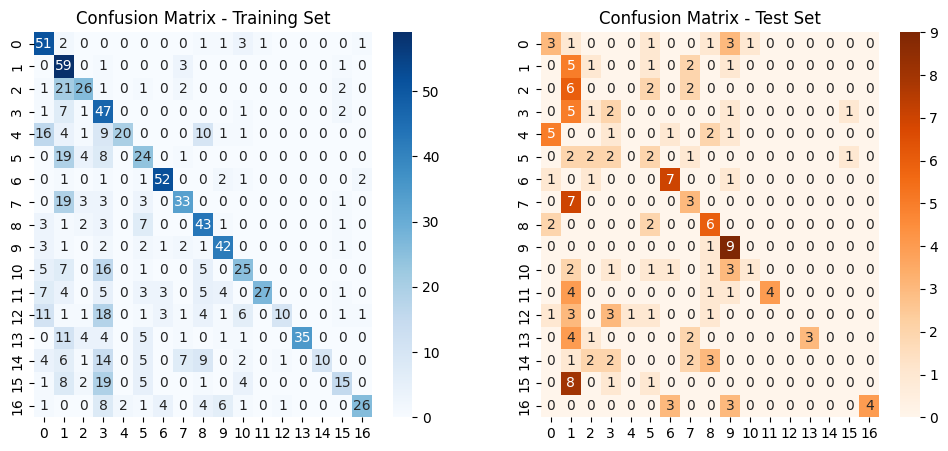

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from google.colab import drive
drive.mount('/content/drive')

# Path to dataset folders
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/flowers1"
train_dir = os.path.join(DATA_DIR, "train")
val_dir = os.path.join(DATA_DIR, "validation")

# Load Dataset using ImageDataGenerator
data_gen = ImageDataGenerator(rescale=1./255)

train_data = data_gen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=1000, class_mode='sparse')
val_data = data_gen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=1000, class_mode='sparse')

# Extract images and labels
X_train, y_train = next(train_data)
X_test, y_test = next(val_data)

# Flatten images for kNN (convert from 3D to 1D)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Function to evaluate model performance
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test):
    conf_matrix_train = confusion_matrix(y_true_train, y_pred_train)
    conf_matrix_test = confusion_matrix(y_true_test, y_pred_test)

    print("=== Training Data Performance ===")
    print(classification_report(y_true_train, y_pred_train))
    print("\nConfusion Matrix (Train):\n", conf_matrix_train)

    print("\n=== Test Data Performance ===")
    print(classification_report(y_true_test, y_pred_test))
    print("\nConfusion Matrix (Test):\n", conf_matrix_test)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Confusion Matrix - Training Set")

    sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
    axes[1].set_title("Confusion Matrix - Test Set")

    plt.show()

# Evaluate the model
evaluate_model(y_train, y_pred_train, y_test, y_pred_test)

A2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results.

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

y_true = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])
y_pred = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)

# R-squared Score (R²)
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse:.4f}")
print("Interpretation: Since MSE is 0, the model has made perfect predictions with no errors.")

print(f"RMSE: {rmse:.4f}")
print("Interpretation: RMSE is 0, which confirms there is no deviation between actual and predicted values.")

print(f"MAPE: {mape:.2f}%")
print("Interpretation: MAPE is 0%, meaning there is no percentage error, reinforcing the perfect fit.")

print(f"R² Score: {r2:.4f}")
print("Interpretation: R² is 1, indicating the model explains 100% of the variance in the data. This is the best possible result.")

print("\nConclusion: The model has achieved a perfect prediction, which is rare in real-world scenarios. This usually happens if the model is tested on training data or has overfitted.")

MSE: 0.0000
Interpretation: Since MSE is 0, the model has made perfect predictions with no errors.
RMSE: 0.0000
Interpretation: RMSE is 0, which confirms there is no deviation between actual and predicted values.
MAPE: 0.00%
Interpretation: MAPE is 0%, meaning there is no percentage error, reinforcing the perfect fit.
R² Score: 1.0000
Interpretation: R² is 1, indicating the model explains 100% of the variance in the data. This is the best possible result.

Conclusion: The model has achieved a perfect prediction, which is rare in real-world scenarios. This usually happens if the model is tested on training data or has overfitted.


A3. Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 - Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class color. Observe the plot.

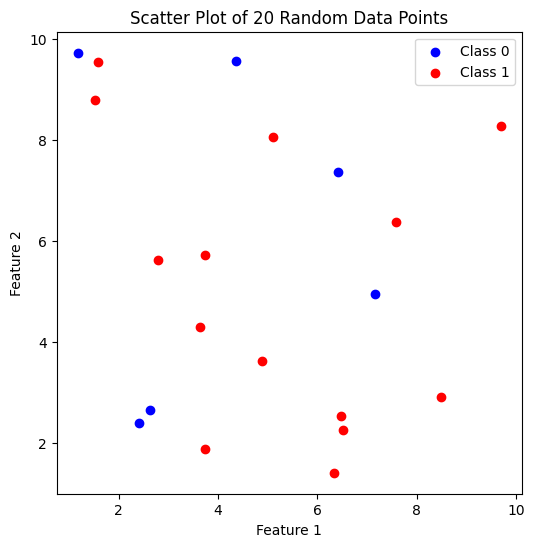

In [5]:
# A3: Generate Training Data & Plot Scatter Plot

def generate_training_data():
    """
    Generates 20 data points with 2 random features (X, Y), assigns them to 2 classes,
    and plots a scatter plot.
    """
    np.random.seed(42)
    X_train = np.random.uniform(1, 10, (20, 2))  # Generate random (X, Y) features
    y_train = np.random.choice([0, 1], size=20)  # Assign classes randomly

    # Scatter plot of data points
    plt.figure(figsize=(6, 6))
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Class 0")
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Class 1")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Scatter Plot of 20 Random Data Points")
    plt.legend()
    plt.show()

    return X_train, y_train

# Generate & Plot Training Data (A3)
X_train_synthetic, y_train_synthetic = generate_training_data()

A4. Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.

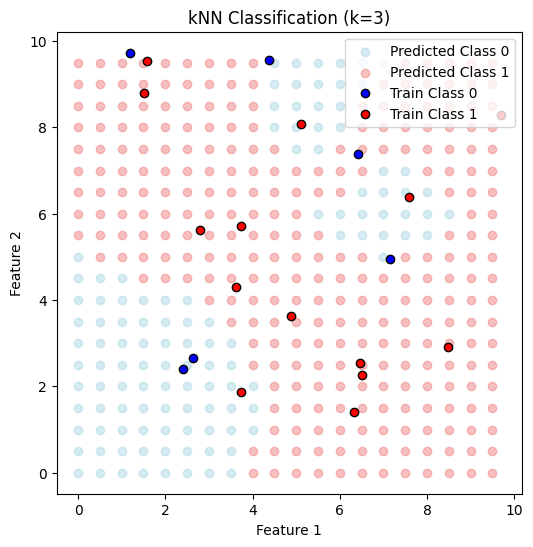

In [6]:
# A4: Generate Test Data, Classify Using kNN & Plot Results

def generate_test_data_and_classify(X_train, y_train, k=3):
    """
    Generates a test dataset and classifies the test points using kNN (k=3).
    Plots the decision boundary.
    """
    # Generate test points
    x_values = np.arange(0, 10, 0.5)
    y_values = np.arange(0, 10, 0.5)
    X_test = np.array([[x, y] for x in x_values for y in y_values])

    # Train kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict class for test points
    y_test_pred = knn.predict(X_test)

    # Scatter plot of test data
    plt.figure(figsize=(6, 6))
    plt.scatter(X_test[y_test_pred == 0, 0], X_test[y_test_pred == 0, 1], color='lightblue', alpha=0.5, label="Predicted Class 0")
    plt.scatter(X_test[y_test_pred == 1, 0], X_test[y_test_pred == 1, 1], color='lightcoral', alpha=0.5, label="Predicted Class 1")

    # Scatter plot of training data (original points)
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Train Class 0", edgecolors='black')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Train Class 1", edgecolors='black')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"kNN Classification (k={k})")
    plt.legend()
    plt.show()

    return X_test, y_test_pred

# Generate Test Data & Classify Using kNN
X_test_synthetic, y_test_synthetic = generate_test_data_and_classify(X_train_synthetic, y_train_synthetic, k=3)

A5. Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

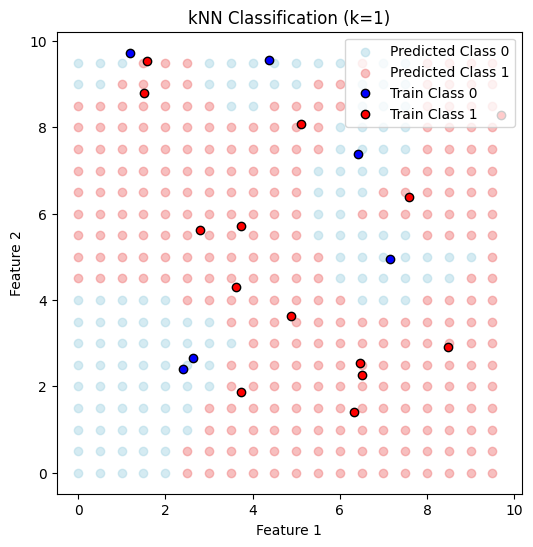

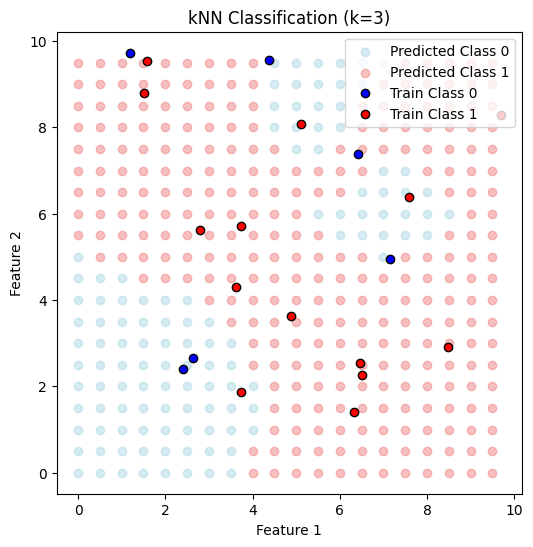

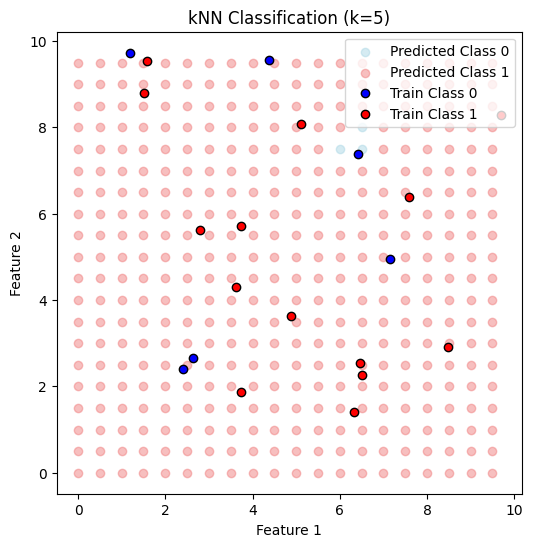

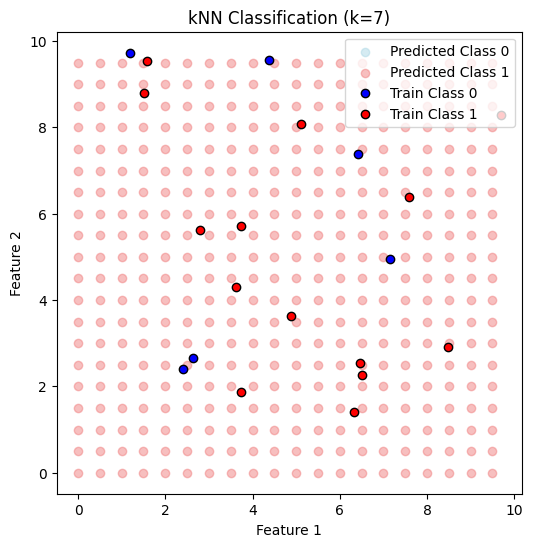

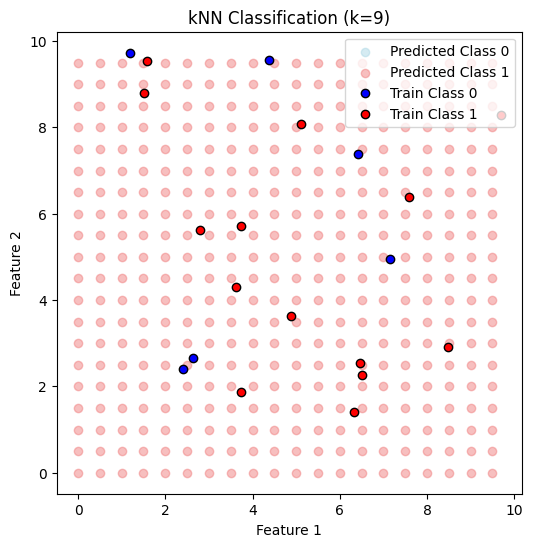

In [7]:
# A5: Classify for Multiple k Values & Plot Scatter Plots

def classify_for_multiple_k(X_train, y_train, k_values):
    """
    Runs kNN classification for multiple k values, plots results for each k, and returns predictions.
    """
    results = {}

    for k in k_values:
        # Generate test points
        x_values = np.arange(0, 10, 0.5)
        y_values = np.arange(0, 10, 0.5)
        X_test = np.array([[x, y] for x in x_values for y in y_values])

        # Train kNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict class for test points
        y_test_pred = knn.predict(X_test)
        results[k] = (X_test, y_test_pred)

        # Plot the classification results
        plt.figure(figsize=(6, 6))
        plt.scatter(X_test[y_test_pred == 0, 0], X_test[y_test_pred == 0, 1], color='lightblue', alpha=0.5, label="Predicted Class 0")
        plt.scatter(X_test[y_test_pred == 1, 0], X_test[y_test_pred == 1, 1], color='lightcoral', alpha=0.5, label="Predicted Class 1")

        # Scatter plot of training data (original points)
        plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label="Train Class 0", edgecolors='black')
        plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label="Train Class 1", edgecolors='black')

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"kNN Classification (k={k})")
        plt.legend()
        plt.show()

    return results

# Run kNN Classification for Multiple k Values & Plot
k_values = [1, 3, 5, 7, 9]
results = classify_for_multiple_k(X_train_synthetic, y_train_synthetic, k_values)

A6. Repeat the exercises A3 to A5 for your project data considering any two features and classes.

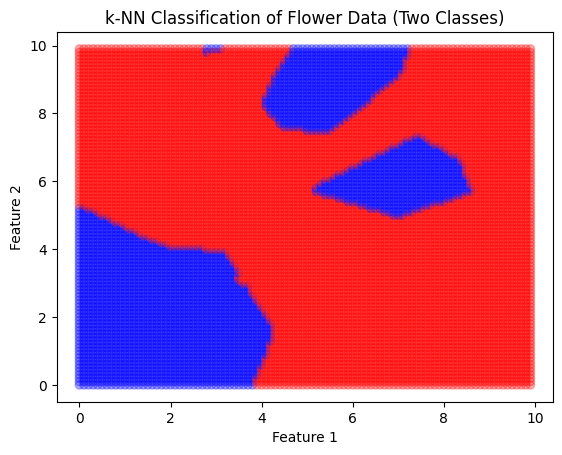

In [ ]:
# Select two classes
class_labels = list(train_data.class_indices.keys())[:2]
X_filtered = []
y_filtered = []

# Filter dataset for two selected classes
for i in range(len(y_train)):
    if y_train[i] in [0, 1]:  # Assuming first two classes are labeled 0 and 1
        X_filtered.append(X_train[i])
        y_filtered.append(y_train[i])

X_filtered = np.array(X_filtered)
y_filtered = np.array(y_filtered)

# Train kNN and classify test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_filtered, y_filtered)
y_pred_test = knn.predict(X_test)

# Plot classification results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='bwr', alpha=0.3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-NN Classification of Flower Data (Two Classes)")
plt.show()

A7. Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning.

In [13]:
# A7: Find Best k Using GridSearchCV & RandomizedSearchCV

def find_best_k(X_train, y_train):
    """
    Performs hyperparameter tuning to find the best k using GridSearchCV and RandomizedSearchCV.
    """
    param_grid = {'n_neighbors': list(range(1, 21))}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10)
    random_search.fit(X_train, y_train)

    return grid_search.best_params_, random_search.best_params_

# Find Best k Using Hyperparameter Tuning
best_k_grid, best_k_random = find_best_k(X_train, y_train)

# Display Best k Values
print("\nBest k (GridSearchCV):", best_k_grid)
print("Best k (RandomizedSearchCV):", best_k_random)


Best k (GridSearchCV): {'n_neighbors': 1}
Best k (RandomizedSearchCV): {'n_neighbors': 1}
